In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile 
import sqlite3
%matplotlib inline

In [2]:
with open('data/rt.movie_info.tsv.gz') as f:
    print(f)
with open('data/rt.reviews.tsv.gz') as f:
    print(f)
with open('data/im.db.zip') as f:
    print(f)
with open('data/tmdb.movies.csv.gz') as f:
    print(f)
with open('data/tn.movie_budgets.csv.gz') as f:
    print(f)

<_io.TextIOWrapper name='data/rt.movie_info.tsv.gz' mode='r' encoding='cp1252'>
<_io.TextIOWrapper name='data/rt.reviews.tsv.gz' mode='r' encoding='cp1252'>
<_io.TextIOWrapper name='data/im.db.zip' mode='r' encoding='cp1252'>
<_io.TextIOWrapper name='data/tmdb.movies.csv.gz' mode='r' encoding='cp1252'>
<_io.TextIOWrapper name='data/tn.movie_budgets.csv.gz' mode='r' encoding='cp1252'>


In [3]:
#Load movie info from Rotten Tomatoes
rt_movie_df = pd.read_csv('data/rt.movie_info.tsv.gz',delimiter = '\t')

#Create list of genres for each record
rt_movie_df['genre list'] = rt_movie_df['genre'].str.split('|')

rt_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
 12  genre list    1552 non-null   object
dtypes: int64(1), object(12)
memory usage: 158.6+ KB


In [4]:
#Load review info from Rotten Tomatoes
rt_review_df = pd.read_csv('data/rt.reviews.tsv.gz',delimiter='\t',encoding = 'unicode_escape')
rt_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [5]:
#Extract imdb sql DB
with zipfile.ZipFile('data/im.db.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall(path='data/')

In [6]:
#Connect to IMDB DB and get schema
con = sqlite3.connect('data/im.db')
pd.read_sql("""

SELECT *
FROM sqlite_master

""",con)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [7]:
#Load 'The Movie DB' dataset
tmdb_df = pd.read_csv('./data/tmdb.movies.csv.gz')
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [8]:
#Load 'The Numbers' dataset
tn_df = pd.read_csv('./data/tn.movie_budgets.csv.gz')
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [9]:
#Load 'Box Office Mojo' dataset
box_office_df = pd.read_csv('./data/bom.movie_gross.csv.gz')
box_office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [10]:
box_office_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


# Creating a master revenue dataset

### Working with dataset from 'The-Numbers.com'
 The dataset has no null values and includes columns for production_budget, domestic_gross and worldwide_gross however, they are all strings. First lets confirm that all numbers are dealing in the same currency ('$')


In [11]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [12]:
print("Is the production budget in dollars for all records?: ",tn_df['worldwide_gross'].str.startswith('$').sum() == len(tn_df))
print("Is the domestic gross in dollars for all records?: ",tn_df['domestic_gross'].str.startswith('$').sum() == len(tn_df))
print("Is the worldwide gross in dollars for all records?: ",tn_df['worldwide_gross'].str.startswith('$').sum() == len(tn_df))

Is the production budget in dollars for all records?:  True
Is the domestic gross in dollars for all records?:  True
Is the worldwide gross in dollars for all records?:  True


It looks all the business related data is in dollars. We can safely convert all the numbers without having to do any currency conversions. To ensure we don't lose track, a currency column is created to include the "$" symbol and all numbers are then proceeded to be converted to floats

In [13]:
#Converting production buget, domestic gross, worldwide gross to numbers, Add currency unit column as a reminder 
#numbers are in $
tn_df['currency'] = '$'
tn_df['production_budget'] = tn_df['production_budget'].str.replace(',','').str.replace('$','').astype(int)
tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace(',','').str.replace('$','').astype(int)
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace(',','').str.replace('$','').astype('int64')

Using these we can generate overall profit a movie has made and also generate a hit/flop column for each movie

 Note: Worldwide gross constitutes domestic gross

In [14]:
#Adding profit column and a hit/flop column based on this number
tn_df['foreign_gross'] = tn_df['worldwide_gross'] - tn_df['domestic_gross']
tn_df['net_revenue'] = tn_df['worldwide_gross'] - tn_df['production_budget']
tn_df['hit/flop'] = tn_df['net_revenue'].map(lambda x: 'hit' if x>0 else 'flop')

In [15]:
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,currency,foreign_gross,net_revenue,hit/flop
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,$,2015837654,2351345279,hit
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,$,804600000,635063875,hit
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,$,107000000,-200237650,flop
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,$,944008095,1072413963,hit
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,$,696540365,999721747,hit


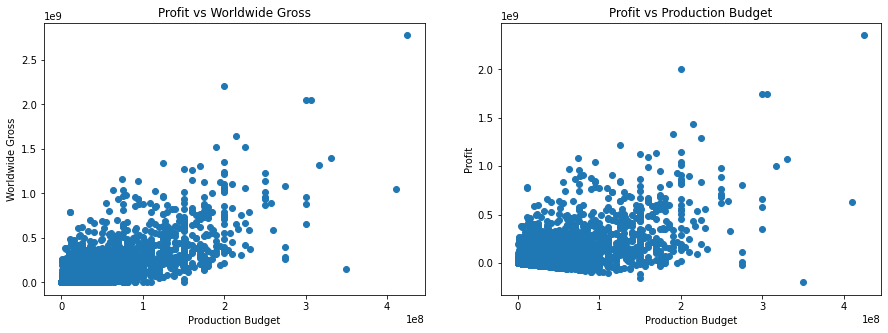

In [16]:
fig,ax = plt.subplots(1,2,figsize = (15,5))

ax[0].scatter(x = tn_df['production_budget'], y = tn_df['worldwide_gross'])
ax[0].set_xlabel('Production Budget')
ax[0].set_ylabel('Worldwide Gross')
ax[0].set_title('Profit vs Worldwide Gross');

ax[1].scatter(x = tn_df['production_budget'], y = tn_df['net_revenue'])
ax[1].set_xlabel('Production Budget')
ax[1].set_ylabel('Profit')
ax[1].set_title('Profit vs Production Budget');

In [17]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int32 
 4   domestic_gross     5782 non-null   int32 
 5   worldwide_gross    5782 non-null   int64 
 6   currency           5782 non-null   object
 7   foreign_gross      5782 non-null   int64 
 8   net_revenue        5782 non-null   int64 
 9   hit/flop           5782 non-null   object
dtypes: int32(2), int64(4), object(4)
memory usage: 406.7+ KB


### Working with the BoxOfficeMojo dataset
There are a few empty values in the studio column. Filling these with 'Unknown'
We note there are a few empty values in the domestic and foreign gross columns. However every record has at least 1 of these 2 values. 

In [18]:
box_office_df['studio'] = box_office_df['studio'].fillna('Unknown') 
box_office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [19]:
box_office_df[box_office_df['domestic_gross'].isna() & box_office_df['foreign_gross'].isna()]

,title,studio,domestic_gross,foreign_gross,year
